In [1]:
import pandas as pd
from utils import group_nation_by_continent, plot_speaker_attr_within_clusters, cluster_with_best_threshold
%matplotlib inline

### Load samples

In [3]:
generated_path = '../../data/merged'

# regular sample
file_name = 'sample.csv'
df_sample = pd.read_csv(generated_path + file_name).sample(n = 20000, random_state = 1)

# sample with pca
file_name = 'sample_pca.csv'
df_sample_pca = pd.read_csv(generated_path + file_name).sample(n = 20000, random_state = 1)

FileNotFoundError: [Errno 2] No such file or directory: '../../data/mergedsample.csv'

### Create different dataframes from sample

In [3]:
speaker_feats = ['date_of_birth', 'nationality', 'gender', 'occupation', 'academic_degree', 'religion']

Regular sample

In [ ]:
# for this sample we use features which have least similar distributions when comparing its distributions for each category within each speaker attribute
selected_feats = ['token_count', 'self_ratio', 'union_ratio', 'verb_per_word', 'pronoun_per_word', 'sentiment']

df_language = df_sample[selected_feats]
df_speaker = df_sample[speaker_feats]
# replace nation by continent in nationality column
df_speaker = group_nation_by_continent(df_speaker)

Regular sample - ver 2

In [4]:
# for this sample we use three features which have least similar distributions when comparing its distributions for each category within each speaker attribute
selected_feats = ['self_ratio', '!_per_sentence', 'union_ratio']

df_language_2 = df_sample[selected_feats]
df_speaker_2 = df_sample[speaker_feats]
# replace nation by continent in nationality column
df_speaker_2 = group_nation_by_continent(df_speaker_2)

/opt/anaconda3/envs/ada/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


PCA sample

In [5]:
selected_feats = [col for col in df_sample_pca.columns if col[:3] == 'pca']

df_language_pca = df_sample_pca[selected_feats]
df_speaker_pca = df_sample_pca[speaker_feats]
# replace nation by continent in nationality column
df_speaker_pca = group_nation_by_continent(df_speaker_pca)

### Generate clusters

In [5]:
thresholds = [0.5 + 0.1*i for i in range(15)]
n_clusters_min = 3

Regular sample

In [7]:
df_speaker_clustered, n_clusters = cluster_with_best_threshold(df_language, df_speaker, thresholds, n_clusters_min)

Threshold 0.5 gave 111 clusters and silhouette score 0.14974393738745634.
Threshold 0.6 gave 67 clusters and silhouette score 0.14273583061223594.
Threshold 0.7 gave 44 clusters and silhouette score 0.16185326987598933.
Threshold 0.8 gave 31 clusters and silhouette score 0.15637538767097808.
Threshold 0.9 gave 21 clusters and silhouette score 0.18931037425744135.
Threshold 1.0 gave 16 clusters and silhouette score 0.20553051764489683.
Threshold 1.1 gave 11 clusters and silhouette score 0.27295391543927283.
Threshold 1.2000000000000002 gave 7 clusters and silhouette score 0.46790748634372004.
Threshold 1.3 gave 5 clusters and silhouette score 0.4898438388615811.
Threshold 1.4 gave 5 clusters and silhouette score 0.4898438388615811.
Threshold 1.5 gave 3 clusters and silhouette score 0.3980127412024988.
Threshold 1.6 gave 3 clusters and silhouette score 0.3980127412024988.
Threshold 1.7000000000000002 gave 2 clusters and silhouette score 0.36223483657794237.
5 clusters was generated with 

Regular sample - ver 2

In [6]:
df_speaker_2_clustered, n_clusters_2 = cluster_with_best_threshold(df_language_2, df_speaker_2, thresholds, n_clusters_min)

Threshold 0.5 gave 14 clusters and silhouette score 0.8174848528227522.
Threshold 0.6 gave 10 clusters and silhouette score 0.6259659245793209.
Threshold 0.7 gave 9 clusters and silhouette score 0.6340938248499296.
Threshold 0.8 gave 7 clusters and silhouette score 0.25873514593903546.
Threshold 0.9 gave 6 clusters and silhouette score 0.2939515625556846.
Threshold 1.0 gave 5 clusters and silhouette score 0.38399310471903947.
Threshold 1.1 gave 4 clusters and silhouette score 0.4064473613179919.
Threshold 1.2000000000000002 gave 3 clusters and silhouette score 0.2584716427661251.
Threshold 1.3 gave 2 clusters and silhouette score 0.45956805981689614.
14 clusters was generated with silhouette score 0.8174848528227522.


PCA sample

In [8]:
df_speaker_pca_clustered, n_clusters_pca = cluster_with_best_threshold(df_language_pca, df_speaker_pca, thresholds, n_clusters_min)

Threshold 0.5 gave 75 clusters and silhouette score 0.02873766362261864.
Threshold 0.6 gave 44 clusters and silhouette score 0.023213972760385882.
Threshold 0.7 gave 25 clusters and silhouette score 0.024177339388136977.
Threshold 0.8 gave 17 clusters and silhouette score 0.014083589829724878.
Threshold 0.9 gave 13 clusters and silhouette score 0.0025560243395597346.
Threshold 1.0 gave 8 clusters and silhouette score 0.05175696535830433.
Threshold 1.1 gave 7 clusters and silhouette score 0.053779494282447556.
Threshold 1.2000000000000002 gave 5 clusters and silhouette score 0.08852198637882432.
Threshold 1.3 gave 3 clusters and silhouette score 0.1031206310559646.
Threshold 1.4 gave 2 clusters and silhouette score 0.7423518332417828.
3 clusters was generated with silhouette score 0.1031206310559646.


### Plot speaker attribute distribution within clusters

Regular sample

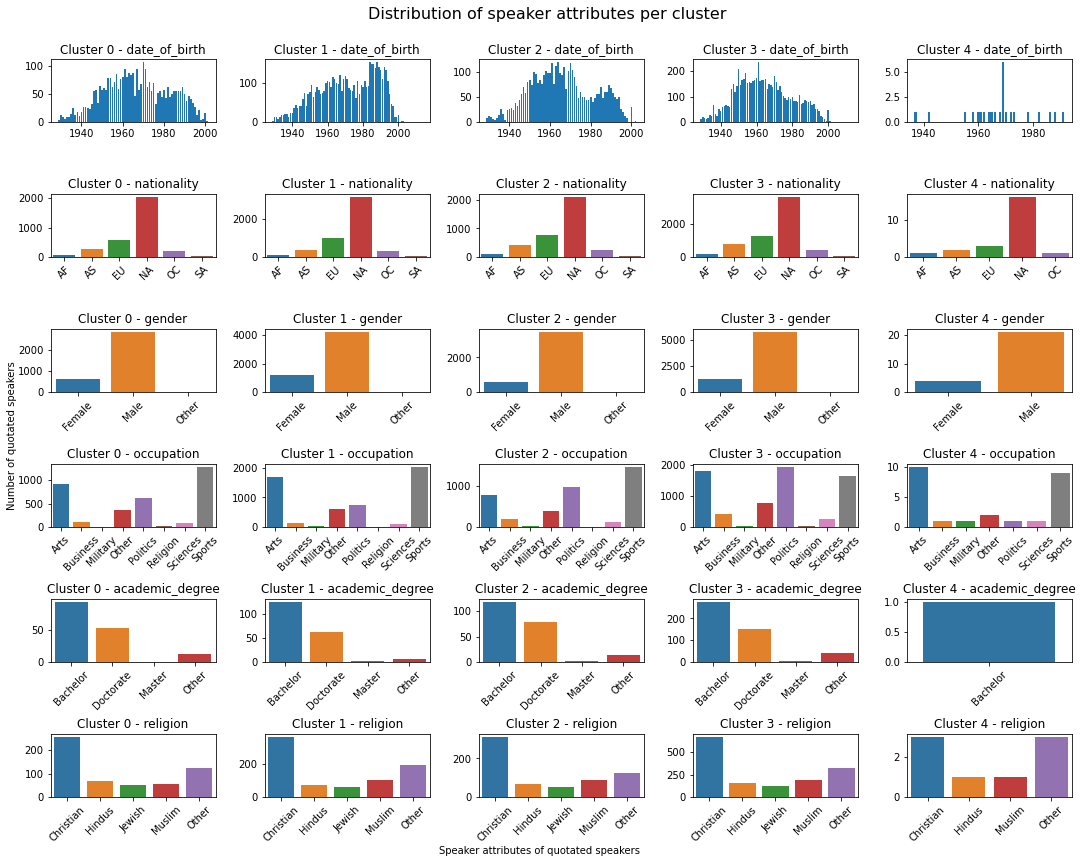

In [9]:
plot_speaker_attr_within_clusters(df_speaker_clustered, speaker_feats, n_clusters)

Regular sample - ver 2

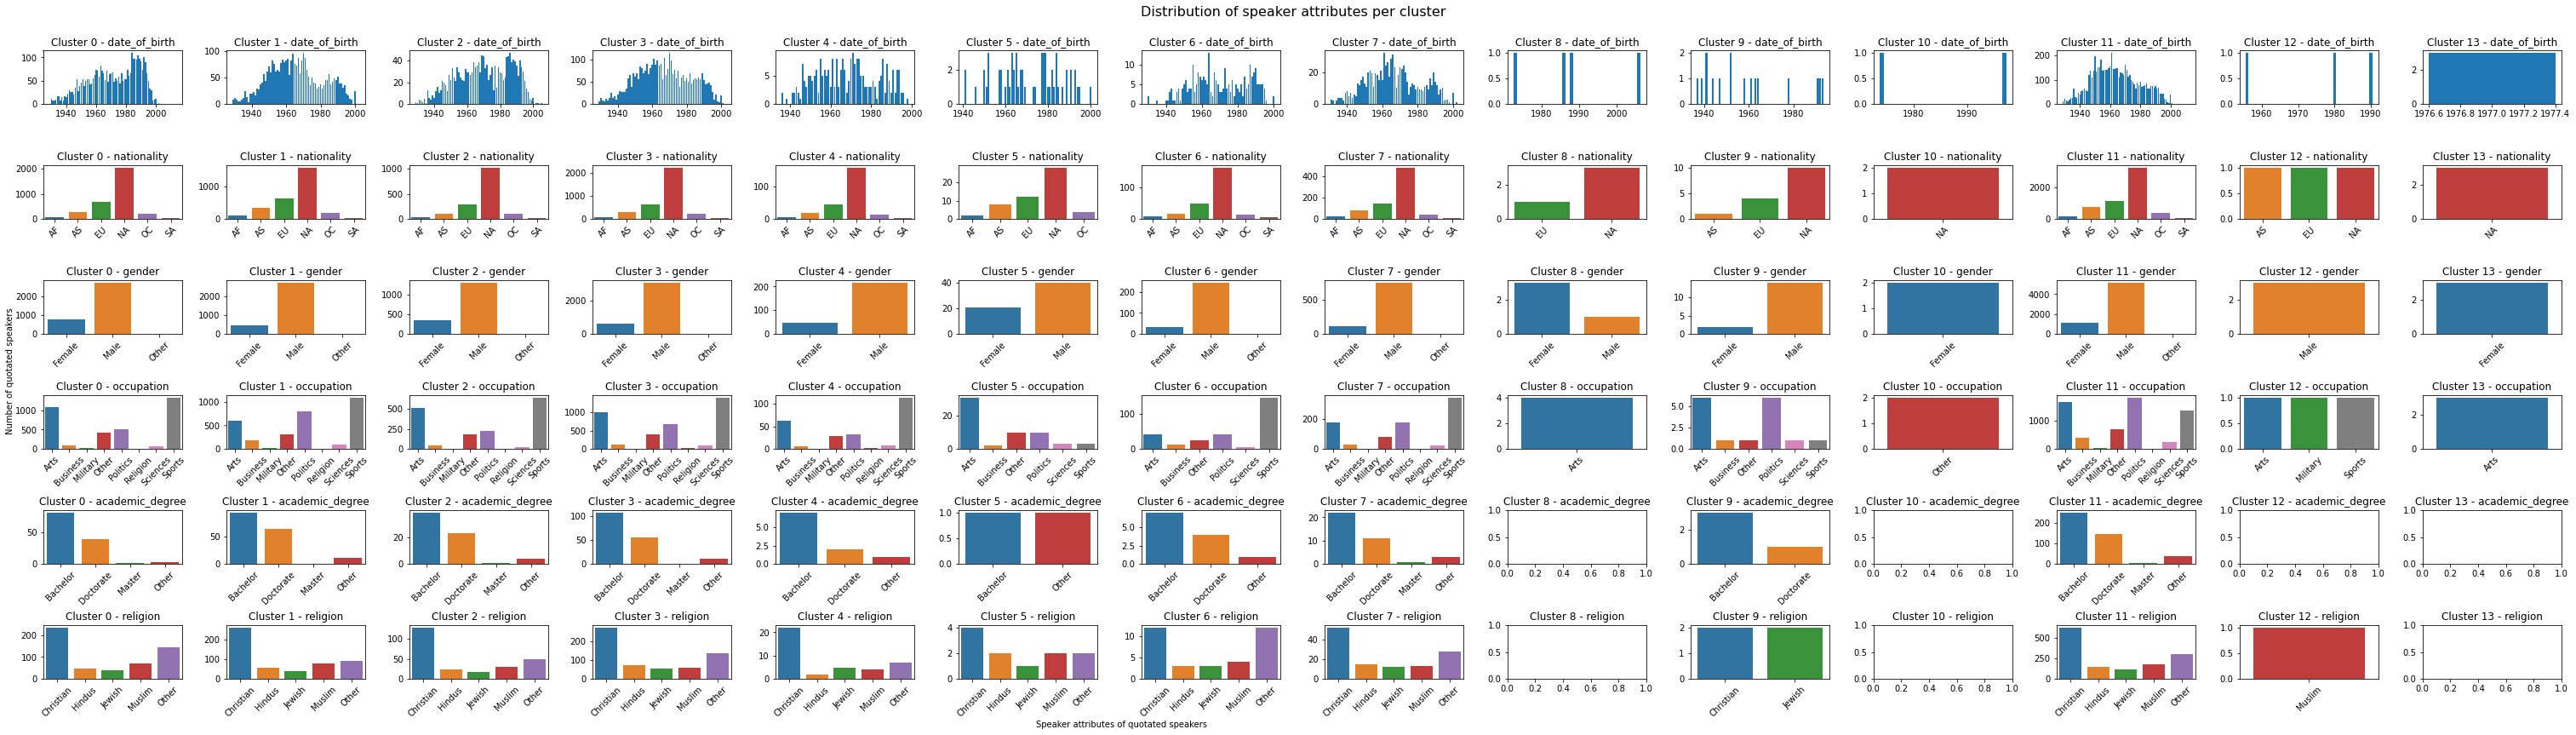

In [7]:
plot_speaker_attr_within_clusters(df_speaker_2_clustered, speaker_feats, n_clusters_2)

PCA sample

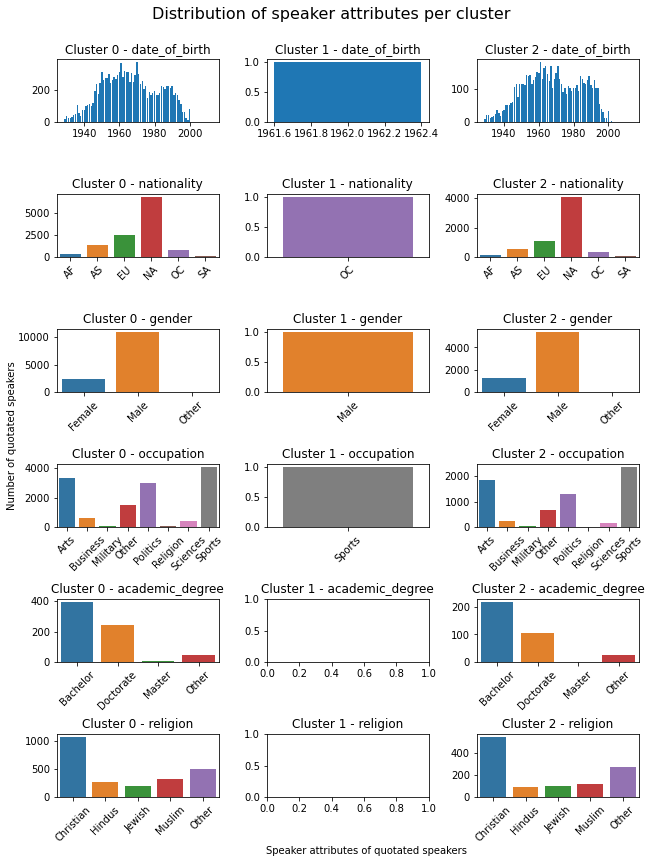

In [10]:
plot_speaker_attr_within_clusters(df_speaker_pca_clustered, speaker_feats, n_clusters_pca)